<a href="https://colab.research.google.com/github/partizanos/advanced_image_processing/blob/master/AIP_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 1. For the f1 and f2 given below determine f1 ∗ f2 analytically (”by hand” without
Matlab) similarly as illustrated in Figure 1.

### (a) 

f1 = [1, 0, 0]

f2 = [0, 1, 0]


### Answer a 

I assume:
f1 (1) = 1,
f1 (2) = 0,
f1 (3) = 0,

and 
f2 (1) = 0,
f2 (2) = 1,
f2 (3) = 0,

Thus 

f1 (1) = $\delta (n-1)$

and 
f2 (1) = $\delta (n-2)$,



=> 
f1 * f2 

= $\sum _{m= - inf} ^{+inf}  f1(m)   f2(n-m) $ 

We observe that f1 and f2  each have only one positive value
So they will have only one non zero result 1*1 f for n = 1




###  (b) 


f1 = [0, 1, 0, 0, 0, 0]

f2 = [1, 1, 1, 1, 1, 1]


### Answer (b) 


Here we have 

f1 (1) = $\delta (n-2)$

and 

f2 (1) = $\delta (n-1) \delta (n-2) \delta (n-3)\delta (n-4)\delta (n-5)$,



We observe that f1 have one positive value
So they will have one non zero result for every value of f2 apart frm the last 

Thus for n = 1, 2, 3, 4, 5 we will have g(n) =1 
###  (c)

f1(n) = δ(n)    + 2δ(n − 1) + 3δ(n − 2)



f2(n) = δ(n + 1) + δ(n) + δ(n − 1) + δ(n − 2)

### Answer (c)

We see it 
f1= [0,1,2,3 ]
f2= [1, 1,1, 1]


Here we will have 

0* 1 = 0

0* 1 + 1 \* 1= 1

0* 1 + 1 \* 1 + 1\* 2   = 3

0* 1 + 1 \* 1 + 1\* 2  + 1 * 3 = 6



##  Exercise 2. ex
### (a) Implement and test the averaging filter for any image. Visualise the image before and after filtering. What effects can you observe? An averaging filter can be implemented by convolving the following mask:


** I observe a more blurry image after convolving the averaging mask** 

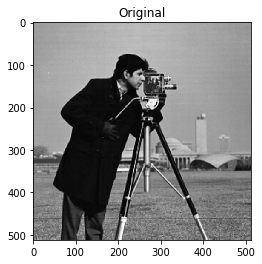

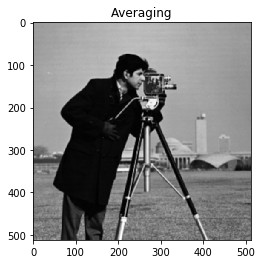

(array([[157, 157, 158],
        [157, 157, 158],
        [157, 157, 156]], dtype=uint8), array([[156, 157, 160],
        [156, 157, 159],
        [158, 157, 156]], dtype=uint8))

In [0]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
img = data.camera()
import cv2
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(img,-1,kernel)

plt.imshow(img, "gray"),plt.title('Original')
plt.show()
plt.imshow(dst, "gray"),plt.title('Averaging')
plt.show()
dst[:3, :3], img[:3, :3]

### (b) Implement and test the Gaussian filter for any image. Visualise the image before and after filtering. What effects can you observe? 

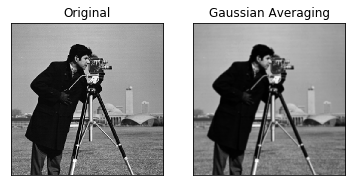

(array([[158, 159, 159],
        [158, 158, 158],
        [158, 158, 158]], dtype=uint8), array([[156, 157, 160],
        [156, 157, 159],
        [158, 157, 156]], dtype=uint8))

In [0]:
blur = cv2.GaussianBlur(img,(3,3),0)

plt.subplot(121),plt.imshow(img, "gray"),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, "gray"),plt.title('Gaussian Averaging')
plt.xticks([]), plt.yticks([])
plt.show()
blur[:3, :3], img[:3, :3]

### c) How could these matrices be modified to increase the blurring effect, i.e. remove more high frequency components.

The bigger they get, that is the more pixels the take into account,  the more blurry the effect.

## Exercise 3. You are given two noisy images tp2 001.jpg and tp2 002.jpg corrupted by ”impulse” noise. 

Defining the optimal parameters by yourself try to remove the noise with:
(a) an averaging filter.
(b) a median filter.

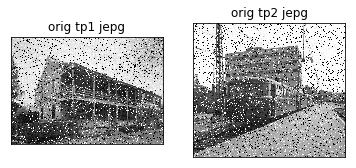

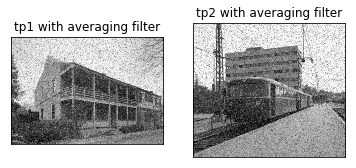

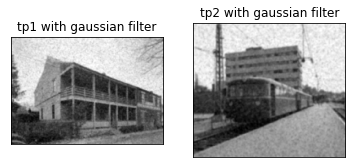

In [0]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import math
from scipy import fftpack 


response = requests.get("https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/TP/TP2/tp2_001.jpg")
im1 = Image.open(BytesIO(response.content))
img1 = np.array(im1)
response = requests.get("https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/TP/TP2/tp2_002.jpg")
im2 = Image.open(BytesIO(response.content))
img2 = np.array(im2)

plt.subplot(121),plt.imshow(img1, "gray"),plt.title('orig tp1 jepg')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2, "gray"),plt.title('orig tp2 jepg')
plt.xticks([]), plt.yticks([])
plt.show()


kernel = np.ones((3,3),np.float32)/9
blur1 =cv2.filter2D(img1,-1,kernel)
blur2 = cv2.filter2D(img2,-1,kernel)

plt.subplot(121),plt.imshow(blur1, "gray"),plt.title('tp1 with averaging filter')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2, "gray"),plt.title('tp2 with averaging filter')
plt.xticks([]), plt.yticks([])
plt.show()



blur1 = cv2.GaussianBlur(img1,(19,19),0)
blur2 = cv2.GaussianBlur(img2,(19,19),0)

plt.subplot(121),plt.imshow(blur1, "gray"),plt.title('tp1 with gaussian filter')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2, "gray"),plt.title('tp2 with gaussian filter')
plt.xticks([]), plt.yticks([])
plt.show()


## Exercise 4. Given the following discrete signal:
x = [5, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 0, 0, 6, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 7, 7, 7, 7]
### (a) Determine the first and second order derivative

see code below
### (b) Plot the original and the derivatives

see code below
### (c) What properties of the first and second order derivative can you see?

It is as if d2 is always a bit earlier on the moves than d1.
And as if d2 does always twice big moves than d1

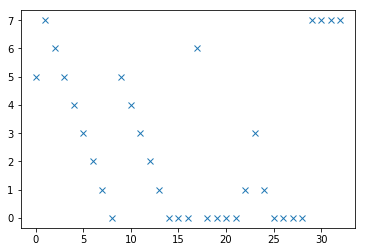

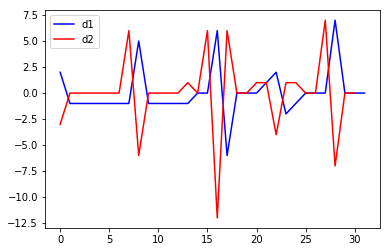

(array([5, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 0, 0, 6, 0, 0, 0, 0,
        1, 3, 1, 0, 0, 0, 0, 7, 7, 7, 7]),
 array([ 2, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,  0,  0,  6,
        -6,  0,  0,  0,  1,  2, -2, -1,  0,  0,  0,  7,  0,  0,  0]),
 array([ -3,   0,   0,   0,   0,   0,   0,   6,  -6,   0,   0,   0,   0,
          1,   0,   6, -12,   6,   0,   0,   1,   1,  -4,   1,   1,   0,
          0,   7,  -7,   0,   0]))

In [0]:
x = [5, 7, 6, 5, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 0, 0, 0, 6, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 7, 7, 7, 7]
x = np.array(x)

d1 = x[1:] - x[0:-1]
d2 = x[2:] + x[0:-2] - 2* x[1:-1]
plt.plot(x, "x");plt.show()
# plt.plot(d1, "bx");
plt.plot(d1, "b");
# plt.plot(d2, "ro");
plt.plot(d2, "r");
plt.legend(["d1","d2"]);plt.show()
x, d1, d2


## Exercise 5. ex
### a) Implement by yourself and test (apply to any image) the Laplacian filter based on Equation 1 and a 3 × 3 neighbourhood. Visualise the image before and after filtering. What effects can you observe?


I observe an enhancement of the edges.

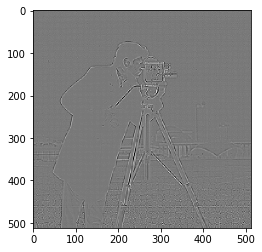

(array([[156, 157, 160],
        [156, 157, 159],
        [158, 157, 156]], dtype=uint8), array([[ 0.,  0.,  0.],
        [ 0.,  1., -5.],
        [ 0.,  0.,  2.]]))

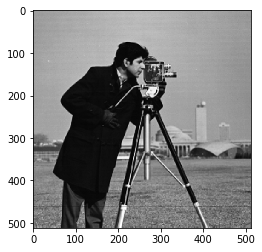

In [0]:
img = data.camera()

def laplacian_filter(img, x, y):
  return int(img[x+1, y]) + int(img[x-1, y]) + int(img[x, y+1]) + int(img[x, y-1]) -( 4 * int(img[x, y]))

rows, cols = img.shape 
new_img = np.zeros(img.shape)
for x in range(1, rows-1):
    for y in range(1, cols-1):
        new_img[x,y] =  laplacian_filter(img, x, y)
        
plt.imshow(new_img, "gray"); plt.show()
plt.imshow(img, "gray")
new_img[:10,:10], img[:10,:10]
img[:3,:3], new_img[:3,:3]


### (b) The Laplacian filter can be implemented by these matrices.  Implement and test (apply to any image) the above Laplacian filter implementations. Visualise the image before and after filtering. What effects can you observe?

We observe that laplacian 2 has much sharper high frequencies,
laplacian  3 table is enhancing the pixel value but looses values from its neighbors.
laplacian 1 table is between the two.

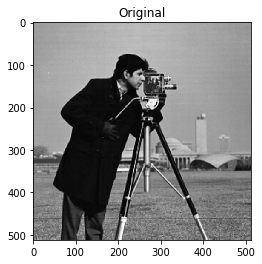

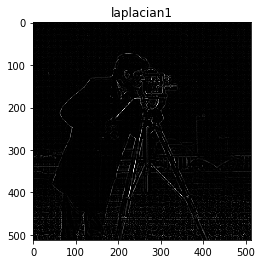

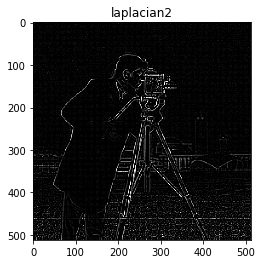

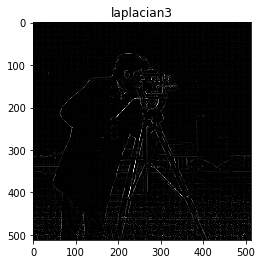

(array([[ 0,  0,  6,  2,  1,  0,  0,  0,  3,  0],
        [ 0,  0,  5,  0,  3,  0,  0,  0,  4,  0],
        [ 2,  0,  0,  0,  1,  1,  1,  1,  0,  2],
        [10,  0,  0,  0,  0,  1,  6,  1,  0,  0],
        [ 2,  0,  0,  0,  1,  0,  0,  0,  1,  0],
        [ 0,  0,  8,  6,  7,  0,  0,  0,  6,  0],
        [ 2,  0,  0,  0,  1,  0,  0,  0,  1,  0],
        [10,  2,  0,  0,  1,  1,  5,  0,  0,  1],
        [ 6,  0,  0,  0,  0,  1,  0,  0,  1,  0],
        [ 3,  0,  0,  0,  1,  1,  4,  3,  5,  0]], dtype=uint8),
 array([[ 6,  4,  0,  0,  0,  3,  6,  3,  0,  0],
        [ 8,  3,  0,  0,  0,  5, 10,  5,  0,  2],
        [ 0,  1,  4,  4,  0,  0,  0,  0,  2,  0],
        [ 0,  0, 17, 16,  2,  0,  0,  0,  0,  0],
        [ 0,  1,  5,  6,  0,  4,  8, 11,  0,  5],
        [10,  1,  0,  0,  0,  1, 11,  6,  0,  2],
        [ 0,  1,  5,  6,  0,  4,  8, 11,  0,  5],
        [ 0,  0,  9,  8,  0,  0,  0,  0,  1,  0],
        [ 0,  5,  9,  9,  2,  0,  0,  1,  0,  7],
        [ 0,  6,  5,  6,  0,  0,  0

In [0]:
img = data.camera()
laplacian = np.array([[0, -1, 0], [-1,4,-1], [0, -1, 0]])
l1 = cv2.filter2D(img,-1,laplacian)
laplacian = np.array([[1,1,1], [1,-8,1], [1,1,1]])
l2 = cv2.filter2D(img,-1,laplacian)
laplacian = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
l3 = cv2.filter2D(img,-1,laplacian)

plt.imshow(img, "gray"),plt.title('Original'),plt.show()
plt.imshow(l1, "gray"),plt.title('laplacian1'),plt.show()


plt.imshow(l2, "gray"),plt.title('laplacian2'),plt.show()
plt.imshow(l1, "gray"),plt.title('laplacian3'),plt.show()

l1[:10,:10],l2[:10,:10],l3[:10,:10]


##  Exercise 6. Take any image. Blur this image with the box filter of size 3 × 3.
### (a) Defining the optimal parameters perform image sharpening using the Gaussian filter.
###  (b) Defining the optimal parameters perform image sharpening using the Laplacian filter. Display blurred and enhanced images. Comment the quality of the enhanced images based on the visual quality and based on the mse between the original and improved images.

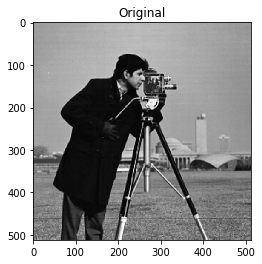

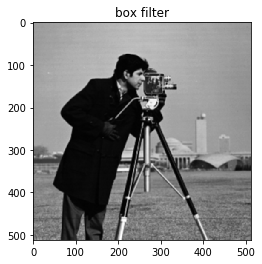

19.442996978759766

In [0]:
kernel = np.ones((3,3))/9
img = data.camera()
box = cv2.filter2D(img,-1,kernel)

plt.imshow(img, "gray"),plt.title('Original'),plt.show()
plt.imshow(box, "gray"),plt.title('box filter'),plt.show()


def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

mse(img, box)

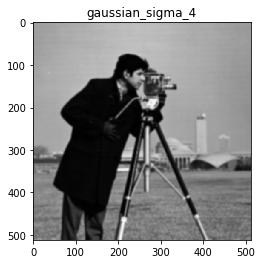

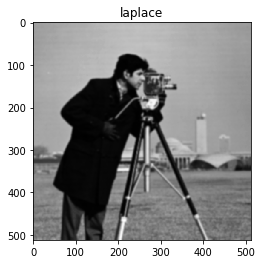

(17841.16018698511, 17701.92132970849)

In [0]:
from skimage.filters import gaussian, laplace
from skimage import data, io
from matplotlib import pyplot as plt  
import skimage 




gaus =  skimage.filters.gaussian(blur, 0.01 )
plt.imshow(gaus, "gray"); plt.title("gaussian_sigma_" + str(sigma)); plt.show()


# for k_size in range(1):
lap =  skimage.filters.laplace(blur)
plt.imshow(gaus, "gray"); plt.title("laplace"); plt.show()

mse(lap, blur), mse( gaus, blur)


## Exercise 7. ex
### 1. Generate 2x100 realisations using randn with zero mean and unit variance. These values, x, are realisations of two random variables X1 and X2 that are Gaussian distributed, i.e
Xi ∼ N (0, 1).
(a) Plot X1 and X2.


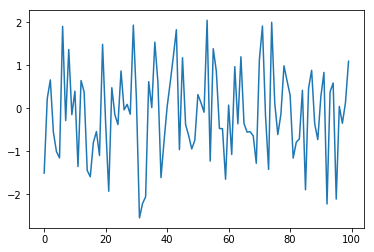

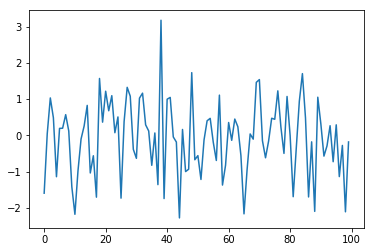

In [0]:
import random 

X1 = np.random.randn(100)
X2  = np.random.randn(100)

plt.plot(X1); plt.show()
plt.plot(X2); 

(b) What is the expectation of Xi
, E[Xi
] (or µXi
).
(c) What is the value of var[X1] and var[X2].


In [0]:
np.mean(X1), np.mean(X2), np.var(X1), np.var(X2)

(-0.11129472956606495,
 -0.0771772667530295,
 1.1254969212555108,
 1.0492648298168827)